# Lab03 - Clustering

## Yêu cầu bài tập

**Cách làm bài**


- Bạn sẽ làm trực tiếp trên file notebook này; trong file, từ `TODO` để cho biết những phần mà bạn cần phải làm. **Không được sửa những chỗ không có** `TODO`.

- Bạn có thể thảo luận ý tưởng cũng như tham khảo các tài liệu, nhưng *code và bài làm phải là của bạn*. 

- Nếu vi phạm thì sẽ bị 0 điểm cho bài tập này.

- Trước khi nộp bài, rerun lại notebook (`Kernel` -> `Restart & Run All`) và ấn Ctrl+S để lưu lại.

**Nội dung bài tập**

Trong bài này, bạn sẽ cài đặt 2 thuật toán `k-means` và `k-medois` để gom nhóm dữ liệu. 

## Import thư viện 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Cài đặt thuật toán K-mean

Tính khoảng cách euclid giữa 2 điểm dữ liệu x, y

In [2]:
def euclidianDistance(x, y):
    '''
    Euclidian distance between x, y
    --------
    Return
    d: float
    '''
    #TODO
    d = 0
    for i in range(len(x)):
        d = d + (x[i] - y[i]) ** 2
    d = d ** 0.5 
    return d

In [3]:
class k_means:
    def __init__(self, k=2, thresold = 0.001, max_iter = 300, has_converged=False):
      
        ''' 
        Class constructor
        
        Parameters
        ----------
        - k: number of clusters. 
        - thresold (percentage): stop algorithm when difference between prev cluster 
                                 and new cluster is less than thresold
        - max_iter: number of times centroids will move
        - has_converged: to check if the algorithm stop or not
        '''

 
        self.k = k
        self.thresold = thresold
        self.max_iter = max_iter
        self.has_converged= has_converged
        
    def initCentroids(self, X):
        ''' 
        Parameters
        ----------
        X: input data. 
        '''
        self.centroids=[]
        
        #Starting clusters will be random members from X set
        indexes = np.random.randint(0, len(X)-1,self.k)
        self.centroids=X[indexes]
            
        
    def updateCentroids(self, cur_centroids):
        '''
        Class constructor
        
        Parameters
        ----------
        cur_centroids: list of new centroids
        
        '''
        self.has_converged=True
        
        for c in range(0,self.k):
            prev_centroid = self.centroids[c]
            cur_centroid  = cur_centroids[c]
            #checking if % of difference between old position and new position is more than thresold
            
            #TODO d=?
            d = euclidianDistance(prev_centroid, cur_centroid)
            
            
            if  d > self.thresold:
                self.has_converged = False
                self.centroids = cur_centroids
            
    def fit(self, X):
        '''
        FIT function, used to find clusters
    
        Parameters
        ----------
        X: input data. 
        '''
        #Init list cluster centroids
        self.initCentroids(X)
            
        #Main loop
        for i in range(self.max_iter):  
            #Centroids for this iteration
            cur_centroids = []
            
            for centroid in range(0,self.k):
                #List samples of current cluster
                samples = []
                
                for k in range(len(X)):
                    d_list = []
                    for j in range(self.k):
                        d_list.append(euclidianDistance(self.centroids[j], X[k]))
                    
                    # Cluster has minimal distance between its centroid and data sample
                    # TODO (c=???)
                    c = d_list.index(min(d_list))

                    #Store sample to list
                    if c == centroid:
                        samples.append(X[k])   
                
                #New centroids of each cluster is calculated by mean of all samples closest to it
                
                #TODO (new_centroid=???)
                new_centroid = sum(samples) / len(samples)
            
                cur_centroids.append(new_centroid)
                
            self.updateCentroids(cur_centroids)
            
            if self.has_converged:
                break
        
        #Each cluster represented by its centroid
        return np.array(self.centroids)

    def predict(self, data):
        ''' 
        Parameters
        ----------
        data: input data.
        
        Returns:
        ----------
        pred: list cluster indexes of input data 
        '''
    
        pred = []
        for i in range(len(data)):
            # Create list distances between centroids and data sample
            d_list = []
            for j in range(len(self.centroids)):
                
                # Calculate distances between current data sample and centroid(using euclidian distance) 
                # Store to d_list
                #TODO 
                d_list.append(euclidianDistance(self.centroids[j], data[i]))
                
            # Store the Cluster has minimal distance between its centroid and current data sample to pred
            #TODO 
            pred.append(d_list.index(min(d_list)))
        return np.array(pred)

## Chạy thuật toán 

**Khởi tạo dữ liệu**

Ta tạo dữ liệu bằng cách lấy các điểm theo phân phối chuẩn có kỳ vọng tại các điểm có tọa độ (2, 2), (8, 3) và (3, 6), ma trận hiệp phương sai giống nhau và là ma trận đơn vị. Mỗi cluster có 500 điểm. (Chú ý rằng mỗi điểm dữ liệu là một hàng của ma trận dữ liệu.

In [4]:
np.random.seed(8) # This will fix the randomization; so, you and me will have the same results

means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)
K = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T



**Hiển thị dữ liệu trên đồ thị**

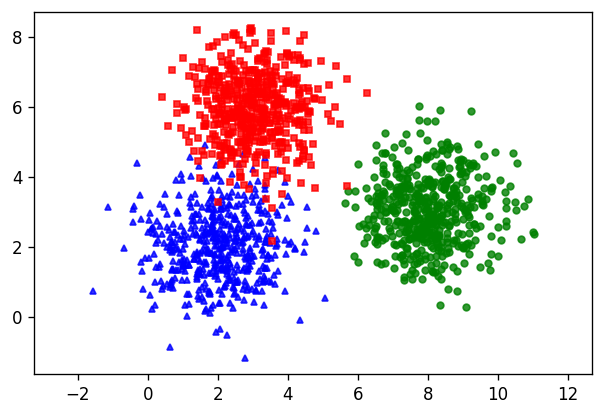

In [5]:
def visualize(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    #you can fix this dpi 
    plt.figure(dpi=120)
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()
    
visualize(X, original_label)

**Gom nhóm dữ liệu bằng thuật toán k-means mà bạn vừa cài đặt**

Centers found by your model:
[[2.01380571 2.02688416]
 [8.02344787 3.061206  ]
 [3.01440769 5.96971345]]


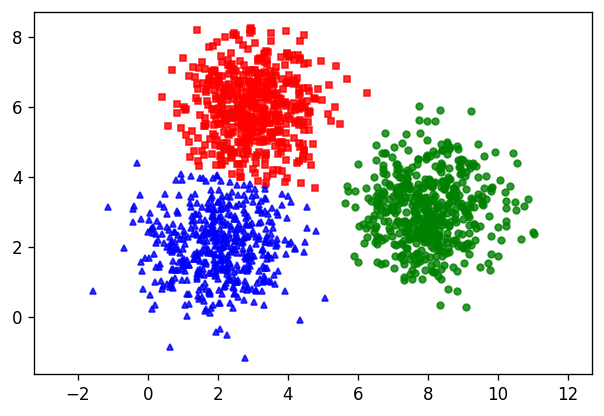

In [6]:
model1=k_means(k=3)
print('Centers found by your model:')
print(model1.fit(X))

pred=model1.predict(X)

visualize(X,pred)


**Thử lại kết quả với scikit learn**

Centers found by scikit-learn:
[[2.01380571 2.02688416]
 [8.02344787 3.061206  ]
 [3.01440769 5.96971345]]


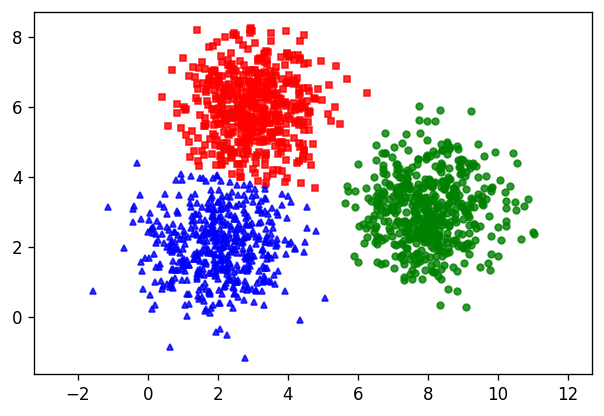

In [7]:
from sklearn.cluster import KMeans
model2 = KMeans(n_clusters=3, random_state=0).fit(X)
print('Centers found by scikit-learn:')
print(model2.cluster_centers_)
pred_label = model2.predict(X)
visualize(X, pred_label)

## 2. Cài đặt thuật toán K-medoids

Các bạn cài đặt và thử nghiệm thuật toán K-medois tương tự như phần 1

In [8]:
#K-medois Implementation
#TODO 
class k_medois:
    def __init__(self, k=2, thresold = 0.001, max_iter = 300, has_converged=False):
      
        ''' 
        Class constructor
        
        Parameters
        ----------
        - k: number of clusters. 
        - thresold (percentage): stop algorithm when difference between prev cluster 
                                 and new cluster is less than thresold
        - max_iter: number of times centroids will move
        - has_converged: to check if the algorithm stop or not
        '''

 
        self.k = k
        self.thresold = thresold
        self.max_iter = max_iter
        self.has_converged= has_converged
        
    def initCentroids(self, X):
        ''' 
        Parameters
        ----------
        X: input data. 
        '''
        self.centroids=[]
        
        #Starting clusters will be random members from X set
        indexes = np.random.randint(0, len(X)-1,self.k)
        self.centroids=X[indexes]
            
        
    def updateCentroids(self, cur_centroids):
        '''
        Class constructor
        
        Parameters
        ----------
        cur_centroids: list of new centroids
        
        '''
        self.has_converged=True
        
        for c in range(0,self.k):
            prev_centroid = self.centroids[c]
            cur_centroid  = cur_centroids[c]
            #checking if % of difference between old position and new position is more than thresold
            d = euclidianDistance(prev_centroid, cur_centroid)           
            
            if  d > self.thresold:
                self.has_converged = False
                self.centroids = cur_centroids
            
    def fit(self, X):
        '''
        FIT function, used to find clusters
    
        Parameters
        ----------
        X: input data. 
        '''
        #Init list cluster centroids
        self.initCentroids(X)
            
        #Main loop
        for i in range(self.max_iter):  
            #Centroids for this iteration
            cur_centroids = []
            
            for centroid in range(0,self.k):
                #List samples of current cluster
                samples = []
                
                for k in range(len(X)):
                    d_list = []
                    for j in range(self.k):
                        d_list.append(euclidianDistance(self.centroids[j], X[k]))
                    
                    # Cluster has minimal distance between its centroid and data sample
                    c = d_list.index(min(d_list))

                    #Store sample to list
                    if c == centroid:
                        samples.append(X[k])   
                
                #The centroids of each cluster is a data point within that cluster such that the total distance from the points in the cluster to it is minimal. 
                temp = self.centroids[centroid]
                for l in samples:
                    cost_centroid = 0
                    cost_new_centroid = 0
                    for m in samples:
                        cost_centroid = cost_centroid +  euclidianDistance(temp, m) 
                        cost_new_centroid = cost_new_centroid + euclidianDistance(l, m) 
                    if cost_new_centroid < cost_centroid:
                        temp = l
                new_centroid = temp    

                cur_centroids.append(new_centroid)
                
            self.updateCentroids(cur_centroids)
            
            if self.has_converged:
                break
        
        #Each cluster represented by its centroid
        return np.array(self.centroids)

    def predict(self, data):
        ''' 
        Parameters
        ----------
        data: input data.
        
        Returns:
        ----------
        pred: list cluster indexes of input data 
        '''
    
        pred = []
        for i in range(len(data)):
            # Create list distances between centroids and data sample
            d_list = []
            for j in range(len(self.centroids)):
                
                # Calculate distances between current data sample and centroid(using euclidian distance) 
                # Store to d_list
                d_list.append(euclidianDistance(self.centroids[j], data[i]))
                
            # Store the Cluster has minimal distance between its centroid and current data sample to pred
            pred.append(d_list.index(min(d_list)))
        return np.array(pred)

**Khởi tạo dữ liệu**

In [9]:
np.random.seed(8) # This will fix the randomization; so, you and me will have the same results

means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)
K = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T

**Gom nhóm dữ liệu bằng thuật toán k-medois vừa cài đặt**

Centers found by your model:
[[1.98413249 2.04159709]
 [7.93224207 3.0213355 ]
 [2.98493437 5.97312308]]


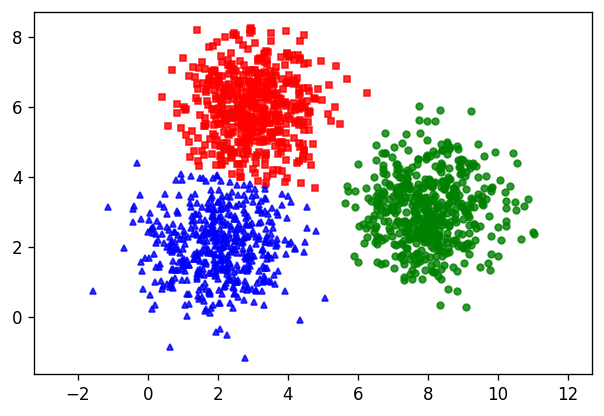

In [10]:
model3=k_medois(k=3)
print('Centers found by your model:')
print(model3.fit(X))

pred=model3.predict(X)

visualize(X,pred)

**Thử lại kết quả với scikit learn extra**

Centers found by scikit-learn-extra:
[[1.98413249 2.04159709]
 [7.93224207 3.0213355 ]
 [2.98493437 5.97312308]]


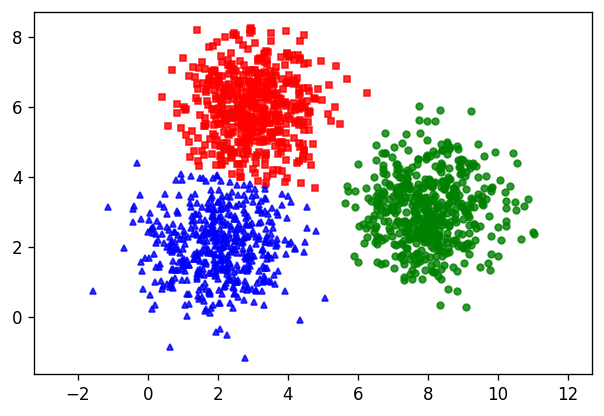

In [11]:
#Nếu chưa cài đặt scikit-learn-extra có thể sử dụng dòng lệnh dưới
#pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids
model4 = KMedoids(n_clusters=3, random_state=0).fit(X)
print('Centers found by scikit-learn-extra:')
print(model4.cluster_centers_)
pred_label = model4.predict(X)
visualize(X, pred_label)

**Nêu điểm khác biệt giữa thuật toán K-means và K-medoids:**

TODO:

Đối với K-means:
- Điểm trung tâm của mỗi cụm là trung bình của tất cả các điểm trong cụm đó. 
- Không hoạt động tốt với các dữ liệu nhiễu, giá trị ngoại lệ, vì một đối tượng có giá trị cực lớn có thể làm sai lệch đáng kể việc phân phối dữ liệu.
- Chỉ áp dụng cho các đối tượng trong không gian n chiều liên tục. Sử dụng phương pháp k-mode cho dữ liệu phân loại.
- Có chi phí tính toán thấp.  
- Không thích hợp để hoặt động trong các cụm có hình dạng không lồi.

Đối với K-medioids:
- Điểm trung tâm của mỗi cụm là một điểm dữ liệu bên trong cụm đó sao cho tổng khoảng cách từ các điểm trong cụm đến nó là nhỏ nhất.
- K-medoids thực hiện tốt hơn đối với giá trị ngoại lệ và giảm nhiễu.
- Có thể được áp dụng cho nhiều loại dữ liệu (nominal, categorical).
- Có chi phí tính toán cao, không thực hiện cho tốt cho các tập dữ liệu lớn. Đối với các giá trị lớn của n và k, việc tính toán như vậy trở nên rất tốn kém.

# 3. Sử dụng thuật toán gom cụm trên tập dữ liệu Iris 

In [12]:
from sklearn import datasets
iris = datasets.load_iris()

In [13]:
X = iris.data
y = iris.target

Text(0, 0.5, 'Pepal Width')

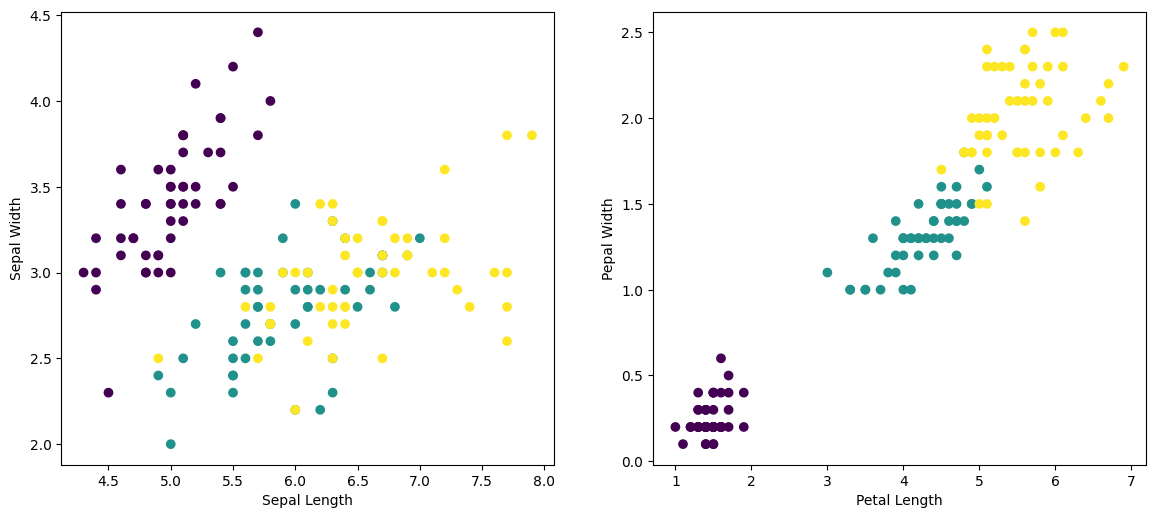

In [14]:
#Visualizing data
fig, axes = plt.subplots(1, 2, figsize=(14,6),dpi=100)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('Sepal Length')
axes[0].set_ylabel('Sepal Width')
axes[1].scatter(X[:,2], X[:,3], c=y)
axes[1].set_xlabel('Petal Length')
axes[1].set_ylabel('Pepal Width')

**Nhận xét:**

TODO: 

Qua biểu đồ phân tán của Sepal (đài hoa) ta thấy có hai cụm tách biệt. Hầu như tất cả các mẫu ngoại trừ một số ngoại lệ của cụm màu tím phía trên bên trái của biểu đồ. Các mẫu khác thuộc cụm  màu vàng và cụm màu xanh lam được trộn lẫn vào nhau thành một cụm lớn hơn. Điều này cho chúng ta thấy rằng chiều rộng đài hoa và chiều dài đài hoa là những đặc điểm tốt để xác định xem mẫu có thuộc cụm màu tím hay không, nhưng sẽ không hoạt động tốt trong việc phân biệt các mẫu giữa cụm màu xanh lam và cụm màu vàng.

Qua biểu đồ phân tán của Petal (cánh hoa) ta thấy nó cũng có đăc điểm gần như tương tự với Sepal. Nó có 2 cụm tách biệt rõ rệt, cụm màu tím không có các mẫu ngoại lệ như ở biểu đồ phân tán Sepal, các mẫu thuộc cụm  màu vàng và cụm màu xanh lam không bị trộn lẫn nhiều chỉ một vài mẫu. Điều này cho chúng ta thấy rằng chiều rộng cánh hoa và chiều dài cánh hoa là những đặc điểm tốt để xác định xem mẫu có thuộc cụm màu tím hay không và hoạt động khá tốt trong việc phân biệt các mẫu giữa cụm màu xanh lam và cụm màu vàng.

Vì vậy, chúng ta sẽ chọn thuộc tính Petal Width và Petal length để sử dụng cho việc gom cụm.


In [15]:
D=X[:,2:]
model=k_means(k=3)
centers = model.fit(D)
print(centers)

[[5.59583333 2.0375    ]
 [4.26923077 1.34230769]
 [1.462      0.246     ]]


Text(0.5, 1.0, 'Predicted')

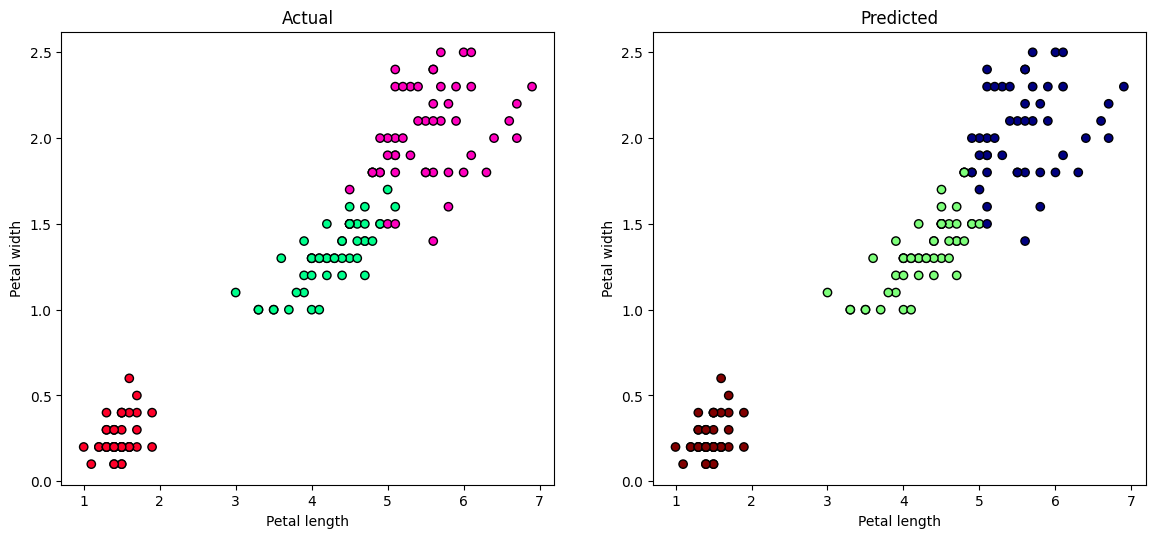

In [16]:
new_labels = model.predict(D)
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(14,6),dpi=100)
axes[0].scatter(D[:, 0], D[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k')
axes[1].scatter(D[:, 0], D[:, 1], c=new_labels, cmap='jet',
edgecolor='k')
axes[0].set_xlabel('Petal length')
axes[0].set_ylabel('Petal width')
axes[1].set_xlabel('Petal length')
axes[1].set_ylabel('Petal width')
axes[0].set_title('Actual')
axes[1].set_title('Predicted')

**Nhận xét kết quả:**

TODO:

Sử dụng K-means để phân cụm đã hoạt động tốt trong việc tách các loài hoa khác nhau trên tập dữ liệu Iris. Trong trường hợp này, chúng ta thấy rằng dữ liệu được tách thành 3 cụm (ứng với 3 giống hoa) khác nhau và K-Means đã nhận ra chính xác những phần tử nào cùng nằm chung 1 cụm. Thuật toán phân chia chính xác nhóm màu đỏ với phần còn lại. Kmeans không ổn định trong việc phân nhóm vì nó trộn các đối tượng trong nhóm màu xanh lá cây và màu xanh dương. 



### Thực hiện tương tự với thuật toán K-medois

In [17]:
#TODO
D=X[:,2:]
model=k_medois(k=3)
centers = model.fit(D)
print(centers)

[[4.4 1.4]
 [1.4 0.2]
 [5.6 2.1]]


Text(0.5, 1.0, 'Predicted')

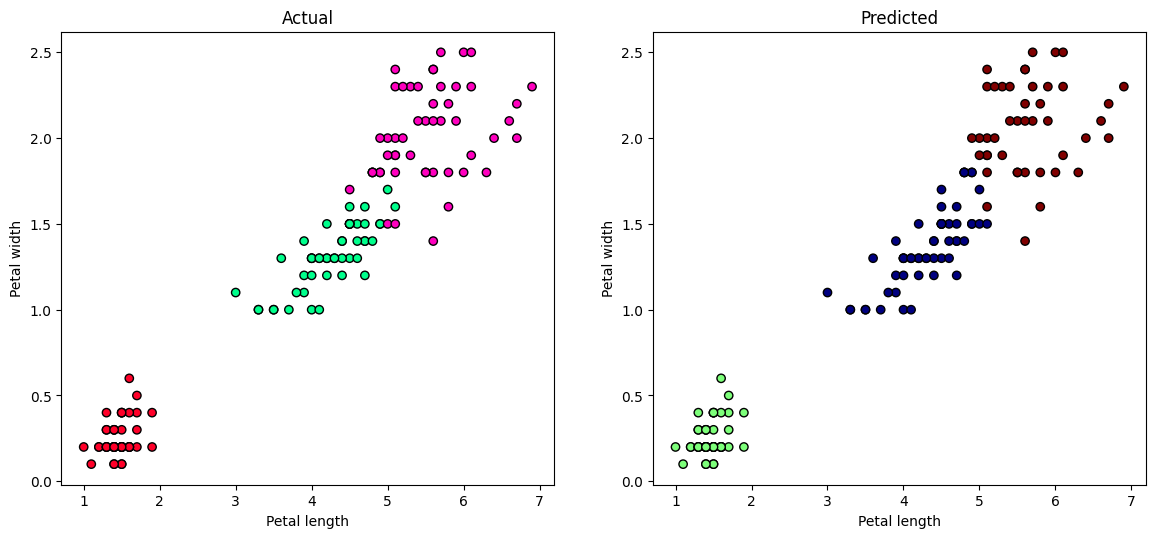

In [18]:
new_labels = model.predict(D)
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(14,6),dpi=100)
axes[0].scatter(D[:, 0], D[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k')
axes[1].scatter(D[:, 0], D[:, 1], c=new_labels, cmap='jet',
edgecolor='k')
axes[0].set_xlabel('Petal length')
axes[0].set_ylabel('Petal width')
axes[1].set_xlabel('Petal length')
axes[1].set_ylabel('Petal width')
axes[0].set_title('Actual')
axes[1].set_title('Predicted')

**Nhận xét kết quả:**

TODO:

Bởi vì đồ thị phân tán không vẽ ra hết các điểm dữ liệu do có nhiều điểm nằm trên cùng một vị trí, nên bằng trực quan không thể nhận xét chính xác được. Theo tài liệu tham khảo thì K-medois hoạt động tốt hơn K-means, độ chính xác phân nhóm của K-means là 88,7% và của K-medois là 92%. Thuật toán phân chia chính xác nhóm màu xanh lá cây với phần còn lại, trong khi đó sự sai lệch giữa cụm màu xanh dương và cụm màu đỏ ít hơn so với việc sử dụng K-means để phân cụm.

**Tài liệu tham khảo sự so sánh giữa K-means và K-medois trên tập dữ liệu Iris**
http://www.ripublication.com/ijcir17/ijcirv13n5_21.pdf
